In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Config')
from lablib import *

# Definizione funzioni

In [27]:
#Legge per la figura di interferenza di Fabry-Perot
lambda_ = 632.8e-9 # lunghezza d'onda del laser
P0 = 101.325 # pressione atmosferica in kPa

def FP_maximum(N, d, delta):
    cos = N*lambda_/(2*d) - (delta*lambda_/(d*np.pi*4)) # coseno dell'angolo di incidenza
    return -cos

#Legge per calibrazione del nonio in Fabry-Perot

def FP_calib(dN):
    d = dN*(lambda_)/2    #variazione di distanza tra le lastre ho messo lambda in micrometri
    return d

def MC_nVetro(dN, d, theta):
    n = (2*d - dN*lambda_)*(1-np.cos(theta))/(2*d * (1-np.cos(theta)) - dN * lambda_)
    return n

def MC_nAria(dN, d, Pf):
    m = (dN  * lambda_)/(2 * d * (P0))
    n = m* P0 + 1
    return n

def Lambda_righello(N, theta_i, theta_n, D):
    return D * (np.cos(theta_i) - np.cos(theta_n)) / N

# Fabry-Perot

## Specchio

Misure di FP1 prese in mm \
sensibilità calibro 0.05mm \
Non ho preso come errore in raggi_fp1_err la sensibilità del calibro perchè le frange erano piuttosto spesse (almeno 1 mm) \
Come errore sulla distanza tra sorgente e muro ho preso 1 cm.

In [28]:
dati_fp1 = pd.read_excel('FP1.xlsx')
raggi_fp1 = dati_fp1[:].dropna().values.T / 1000 # raggi in m
raggi_fp1_err = [0.00005]*len(raggi_fp1[0]) # errore raggi in m
d_sorgente = 1.375 # distanza da sorgente in m
d_sorgente_err = 0.001 # errore distanza sorgente in m


N_fp1 = list(range(1, len(raggi_fp1[0])+1))
massimi_fp1 = [[np.cos(np.arctan(raggi_fp1[i][j])) for j in range(len(raggi_fp1[i]))] for i in range(len(raggi_fp1))]
massimi_fp1_err = [[np.sqrt(((d_sorgente*np.array(raggi_fp1_err[i]))/(d_sorgente**2 + np.array(raggi_fp1[i][j])**2))**2 + ((np.array(raggi_fp1[i][j])*d_sorgente_err)/(d_sorgente**2 + np.array(raggi_fp1[i][j])**2))**2) for j in range(len(raggi_fp1[i]))] for i in range(len(raggi_fp1))]


In [29]:
par1, val1, ers1, *other1 = LS_fit(N_fp1, massimi_fp1[0], massimi_fp1_err[0], FP_maximum, d = 0.002, delta = 5e4, disp = 1)
par2, val2, ers2, *other2 = LS_fit(N_fp1, massimi_fp1[1], massimi_fp1_err[1], FP_maximum, d = 0.002, delta = 5e4, disp = 0)
par3, val3, ers3, *other3 = LS_fit(N_fp1, massimi_fp1[2], massimi_fp1_err[2], FP_maximum, d = 0.002, delta = 5e4, disp = 0)
par4, val4, ers4, *other4 = LS_fit(N_fp1, massimi_fp1[3], massimi_fp1_err[3], FP_maximum, d = 0.002, delta = 5e4, disp = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.075 (χ²/ndof = 0.1)      │              Nfcn = 78               │
│ EDM = 1.23e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ d     │ 2.522e-3  │ 0.028e-3  │            │            │         │         │       │
│ 1 │ delta │  50.1e3   │   0.6e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────┐
│       │             d         delta │
├───────┼─────────────────────────────┤
│     d │      8.15e-10 16.1649530e-3 │
│ delta │ 16.1649530e-3      3.21e+05 │
└───────┴─────────────────────────────┘

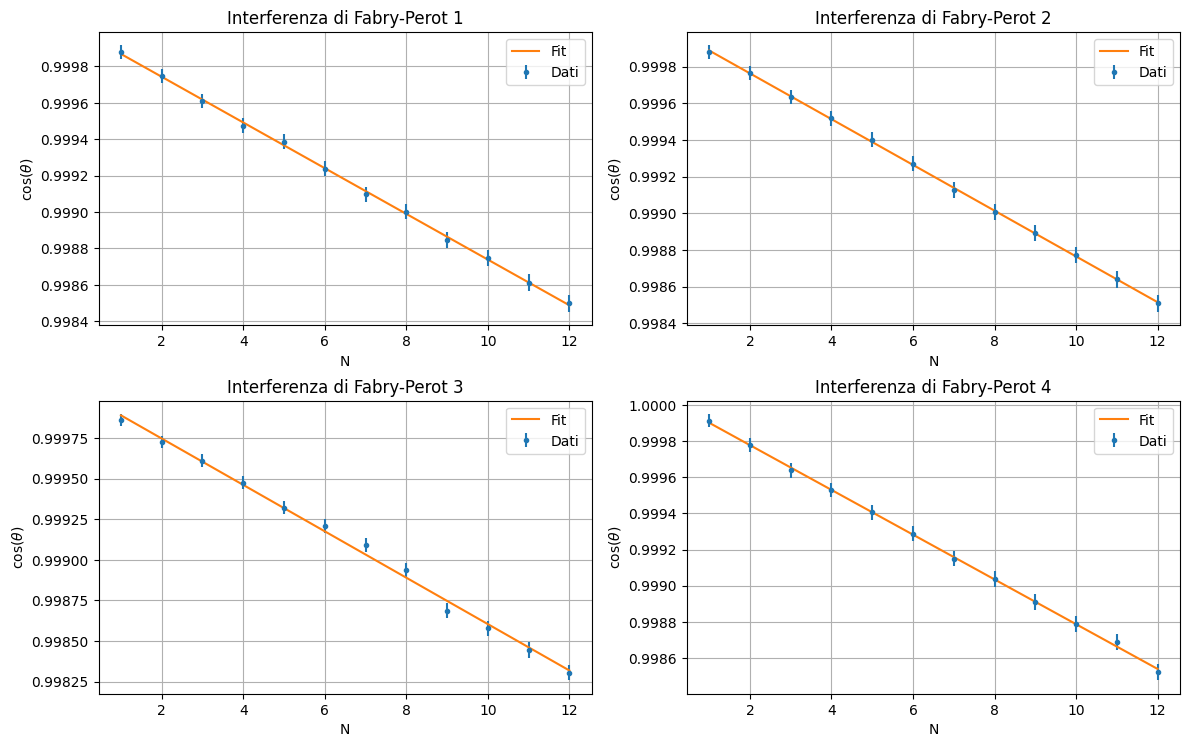

In [30]:
#Grafici per Fabry-Perot da inserire nella relazione

fig, ax = plt.subplots(2, 2, figsize = (12, 8))
ax[0, 0].errorbar(N_fp1, massimi_fp1[0], yerr = massimi_fp1_err[0], fmt = '.', label = 'Dati')
ax[0, 0].plot(N_fp1, FP_maximum(np.array(N_fp1), *val1), label = 'Fit')
ax[0, 0].set_title('Interferenza di Fabry-Perot 1')
ax[0, 0].set_xlabel('N')
ax[0, 0].set_ylabel('cos($\\theta$)')
ax[0, 0].legend()
ax[0, 0].grid()
ax[0, 1].errorbar(N_fp1, massimi_fp1[1], yerr = massimi_fp1_err[1], fmt = '.', label = 'Dati')
ax[0, 1].plot(N_fp1, FP_maximum(np.array(N_fp1), *val2), label = 'Fit')
ax[0, 1].set_title('Interferenza di Fabry-Perot 2')
ax[0, 1].set_xlabel('N')
ax[0, 1].set_ylabel('cos($\\theta$)')
ax[0, 1].legend()
ax[0, 1].grid()
ax[1, 0].errorbar(N_fp1, massimi_fp1[2], yerr = massimi_fp1_err[2], fmt = '.', label = 'Dati')
ax[1, 0].plot(N_fp1, FP_maximum(np.array(N_fp1), *val3), label = 'Fit')
ax[1, 0].set_title('Interferenza di Fabry-Perot 3')
ax[1, 0].set_xlabel('N')
ax[1, 0].set_ylabel('cos($\\theta$)')
ax[1, 0].legend()
ax[1, 0].grid()
ax[1, 1].errorbar(N_fp1, massimi_fp1[3], yerr = massimi_fp1_err[3], fmt = '.', label = 'Dati')
ax[1, 1].plot(N_fp1, FP_maximum(np.array(N_fp1), *val4), label = 'Fit')
ax[1, 1].set_title('Interferenza di Fabry-Perot 4')
ax[1, 1].set_xlabel('N')
ax[1, 1].set_ylabel('cos($\\theta$)')
ax[1, 1].legend()
ax[1, 1].grid()
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

In [31]:
for i in range(len(par1)):
    print(f'{par1[i]}1: {val1[i]:.3g} ± {ers1[i]:.3g}')
    print(f'{par2[i]}2: {val2[i]:.3g} ± {ers2[i]:.3g}')
    print(f'{par3[i]}3: {val3[i]:.3g} ± {ers3[i]:.3g}')
    print(f'{par4[i]}4: {val4[i]:.3g} ± {ers4[i]:.3g}')
    if i == 0:
        print("--------------------")

print("--------------------")
print(f"Media delta: {(val1[1]+val2[1]+val3[1]+val4[1])/4:.3g} ± {(np.sqrt(ers1[1]**2+ers2[1]**2+ers3[1]**2+ers4[1]**2)/4):.3g}")
print("--------------------")

print(f"Chi 1: {(other1[2]/other1[1]):.3g} - Pvalue 1: {other1[0]:.3g}")
print(f"Chi 2: {(other2[2]/other2[1]):.3g} - Pvalue 2: {other2[0]:.3g}")
print(f"Chi 3: {(other3[2]/other3[1]):.3g} - Pvalue 3: {other3[0]:.3g}")
print(f"Chi 4: {(other4[2]/other4[1]):.3g} - Pvalue 4: {other4[0]:.3g}")

d1: 0.00252 ± 2.85e-05
d2: 0.00254 ± 2.86e-05
d3: 0.00222 ± 2.47e-05
d4: 0.00255 ± 2.87e-05
--------------------
delta1: 5.01e+04 ± 566
delta2: 5.04e+04 ± 567
delta3: 4.4e+04 ± 490
delta4: 5.06e+04 ± 569
--------------------
Media delta: 4.88e+04 ± 275
--------------------
Chi 1: 0.107 - Pvalue 1: 1
Chi 2: 0.0398 - Pvalue 2: 1
Chi 3: 0.72 - Pvalue 3: 0.707
Chi 4: 0.0756 - Pvalue 4: 1


## Frange

20 micrometri -> passonomio \
N frange = 56, 59, 60, 60, 64, 56 \
Approssimiamo $\cos\theta$ a 1

In [40]:
delta_N_fp = [61, 64, 59, 60, 60, 64] # possibilmente aggiungere 56, 56
delta_d_fp = [FP_calib(delta_N_fp[i]) for i in range(len(delta_N_fp))]
print(delta_d_fp)
print(f"Media: {np.mean(delta_d_fp):.5g} ± {np.std(delta_d_fp, ddof = 1):.5g}")

[1.93004e-05, 2.02496e-05, 1.86676e-05, 1.8984e-05, 1.8984e-05, 2.02496e-05]
Media: 1.9406e-05 ± 6.835e-07


# Michelson

## Frange

Abbiamo spostato sempre di 20 $\mu m$ per quanto possibile

In [33]:
delta_N_mc = [62, 60, 60] # possibilmente aggiuntere 60, 64
delta_d_mc = [FP_calib(delta_N_mc[i]) for i in range(len(delta_N_mc))]

print(delta_d_mc)
print(f"Media: {np.mean(delta_d_mc):.3g} - Deviazione standard: {np.std(delta_d_mc):.3g}")

[1.96168e-05, 1.8984e-05, 1.8984e-05]
Media: 1.92e-05 - Deviazione standard: 2.98e-07


Ricontrollare l'ordine di grandezza \
Inoltre per confrontare i due metodi possiamo confrontare le due varianze

## Indice rifrazione aria

misura lunghezza cella $\approx$ 3 cm  dal PASCO \
unità di misura della pressione kPa

Si può tentare di usare i inHg (non mm o cm, ma inch) invece di kPa

In [34]:
l_cella = 0.03

pressf1, N1_aria = 76, 16
presf2, N2_aria = 80, 18
presf3, N3_aria = 50, 11
presf4, N4_aria = 42, 9

n_aria = [MC_nAria(N1_aria, l_cella, pressf1), MC_nAria(N2_aria, l_cella, presf2), MC_nAria(N3_aria, l_cella, presf3), MC_nAria(N4_aria, l_cella, presf4)]

print(n_aria)
print(f"Media: {np.mean(n_aria):.6g} - Deviazione standard: {np.std(n_aria):.3g}")

[1.0001687466666667, 1.00018984, 1.0001160133333333, 1.00009492]
Media: 1.00014 - Deviazione standard: 3.84e-05


## Indice rifrazione vetro

In [35]:
thetai1, thetaf1, N1_vetro = *np.deg2rad([-0.4, 4.0]), 19
thetai2, thetaf2, N2_vetro = *np.deg2rad([-0.4, 5.0]), 29
thetai3, thetaf3, N3_vetro = *np.deg2rad([-0.4, 6.1]), 42
thetai4, thetaf4, N4_vetro = *np.deg2rad([-0.4, 2.9]), 11
d_vetro = .005


n_vetro = [MC_nVetro(N1_vetro, d_vetro, thetai1-thetaf1), MC_nVetro(N2_vetro, d_vetro, thetai2-thetaf2), MC_nVetro(N3_vetro, d_vetro, thetai3-thetaf3), MC_nVetro(N4_vetro, d_vetro, thetai4-thetaf4)]

for i in range(len(n_vetro)):
    print(f'n_vetro_{i+1}: {n_vetro[i]:.3g}')
print(f"n_vetro medio: {np.mean(n_vetro):.3g} ± {np.std(n_vetro):.3g}")

n_vetro_1: 1.69
n_vetro_2: 1.7
n_vetro_3: 1.7
n_vetro_4: 1.72
n_vetro medio: 1.7 ± 0.0126


## Righello

In [36]:
# primo tentativo
D = 1.47 #m
dist_P0Pt = 0.171 #m
distanze = np.array([0.016, 0.029, 0.041, 0.051, 0.062])
theta_i = np.arctan((dist_P0Pt/2)/D)
theta_n = np.arctan((dist_P0Pt/2 + distanze) / D) # in teoria sono radianti

lambda_laser = [Lambda_righello(i+1, theta_i, theta_n[i], D) for i in range(len(distanze))]

print(lambda_laser)
print(f"Media: {np.mean(lambda_laser):.3g} - Deviazione standard: {np.std(lambda_laser):.3g}")

[0.0010114978920827478, 0.000979445644865119, 0.0009775695793801187, 0.0009541550327879081, 0.000972896473404312]
Media: 0.000979 - Deviazione standard: 1.85e-05


In [37]:
# secondo tentativo
D = 1.03 #m
dist_P0Pt = 0.12 #m
distanze = np.array([0.01, 0.02, 0.028, 0.035, 0.043])
theta_i = np.arctan((dist_P0Pt/2)/D)
theta_n = np.arctan((dist_P0Pt/2 + distanze) / D) # in teoria sono radianti

lambda_laser = [Lambda_righello(i+1, theta_i, theta_n[i], D) for i in range(len(distanze))]

print(lambda_laser)
print(f"Media: {np.mean(lambda_laser):.3g} - Deviazione standard: {np.std(lambda_laser):.3g}")

[0.0006272948897506536, 0.0006748360339295684, 0.0006652098981274394, 0.000652543703348713, 0.000673711263406954]
Media: 0.000659 - Deviazione standard: 1.76e-05
